In [1]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from matplotlib import cm
import ast
import pickle
import matplotlib
import h5py
from matplotlib import ticker
from scipy import stats

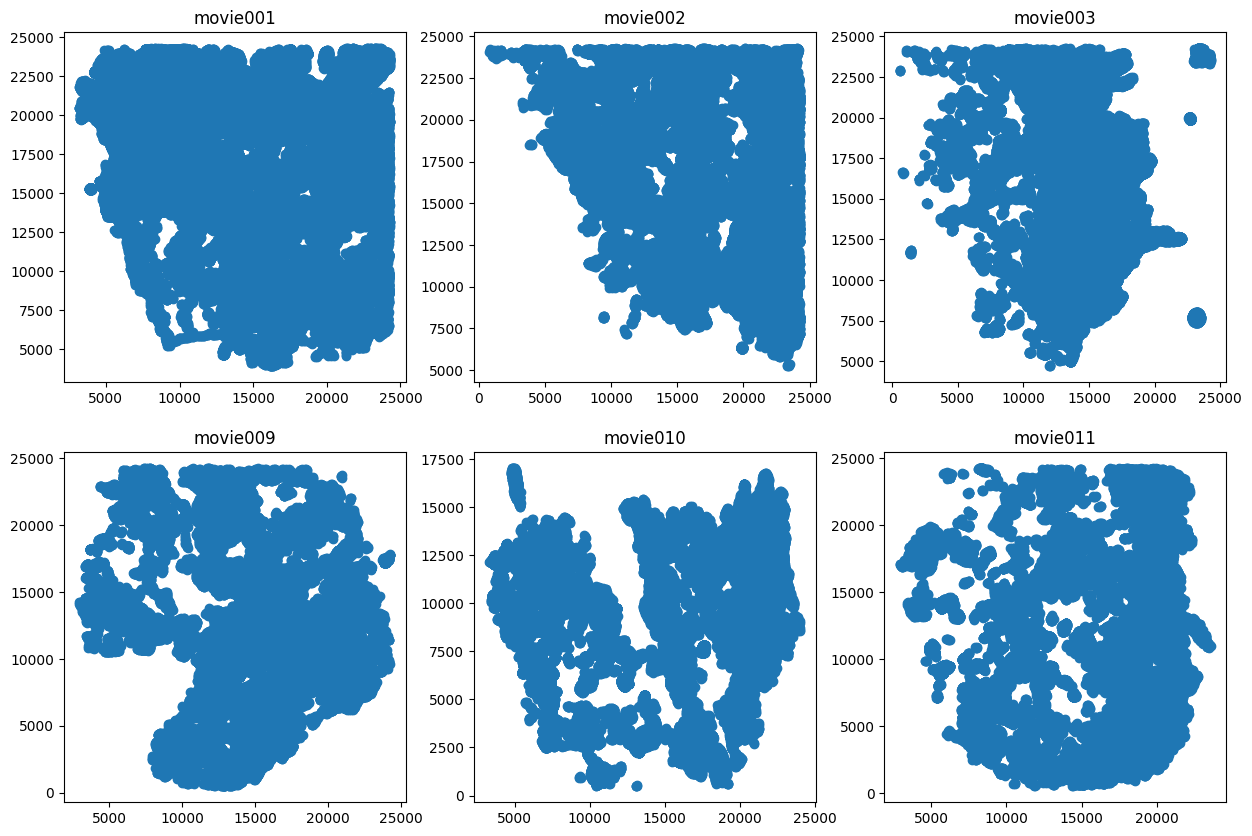

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the list of files to plot
files = ['01', '02', '03', '09', '10', '11']

# Create a figure with 3 rows and 2 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over the files and plot each one in a subplot
for i, file in enumerate(files):
    data = np.genfromtxt('C:/Users/vkuma/PresseLab/Research/Data/CleanData/movie0' + file + '.txt', delimiter=', ', skip_header=1)

    # Separate columns into individual arrays
    dataVectIndex = data[:, 0]
    dataVect = data[:, 1:]

    # Make pixel adjustment to nanometers
    dataVect = dataVect[::]*97
    dataVectIndex = dataVectIndex[::]

    # Plot the data in the current subplot
    axes[i//3, i%3].scatter(dataVect[:, 0], dataVect[:, 1])

    # Add a title to the current subplot
    axes[i//3, i%3].set_title('movie0' + file)

# Show the figure
plt.show()

In [2]:
file = open("C:/Users/vkuma/PresseLab/Research/200 5170.375220631081 3626.601735051907variables.pkl", "rb")
variables = pickle.load(file)
file = open("C:/Users/vkuma/PresseLab/Research/200 5170.375220631081 3626.601735051907data.pkl", "rb")
data = pickle.load(file)
file = "C:/Users/vkuma/PresseLab/Research/200(5170.375220631081 3626.601735051907).h5"
f = h5py.File(file, 'r')
dVect= f['samples'][()]
pVect = f['prob'][()]

In [8]:
def diffusion(x, y):
    value = (1e5 + 
             30000*np.sin(x/1500) + 
             30000*np.sin(y/1500))
    return np.abs(value/2)

In [9]:
# Prior
priorMean = variables.priorMean
diff = diffusion(variables.induCoordinates[:, 0], variables.induCoordinates[:, 1]) - priorMean
prior =  (-1/2)*(diff.T @ (variables.cInduInduInv @ diff))

#grnd of data associated with fIndu
dData = diffusion(variables.dataCoordinates[:, 0], variables.dataCoordinates[:, 1])
sd = np.vstack((dData, dData)).T

#Likelihood of that data
lhood = np.sum(stats.norm.logpdf(variables.sampleCoordinates, loc = variables.dataCoordinates, scale = np.sqrt(2*sd*data.deltaT)))
prob = lhood + prior
print(prior, lhood, prob)

-618.1195891094865 -2080394.9232903318 -2081013.0428794413


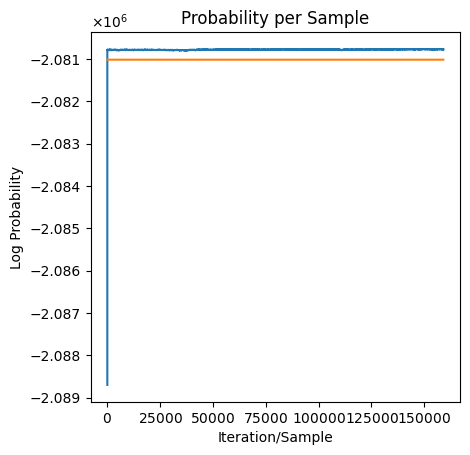

In [10]:
#generate plot
fig, ax = plt.subplots(1, 1)
plt.plot(pVect[:])
plt.plot(prob*np.ones(len(pVect[1:])))
plt.title("Probability per Sample")
plt.xlabel("Iteration/Sample")
plt.ylabel("Log Probability")
plt.ticklabel_format(useMathText=True)
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter)
class ScalarFormatterClass(ticker.ScalarFormatter):
   def _set_format(self):
      self.format = "%1.3f"
yScalarFormatter = ScalarFormatterClass(useMathText=True)
yScalarFormatter.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yScalarFormatter)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

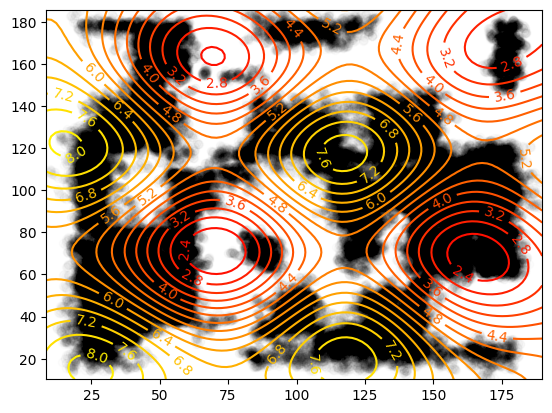

In [11]:
#necassary variables
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories

#shape for plot
shape = (nFineX, nFineY)

#take mean of all samples
unshapedMap = cInduFine.T @ cInduInduInv @ np.mean(dVect, 0)

#reshape variables to make plotting easy
shapedMap = np.reshape(unshapedMap, shape)
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)

#generate contour plot
fig = plt.figure()
mapPlot = plt.contour(shapedX/100, shapedY/100, shapedMap/10000, levels = 15, cmap = cm.autumn)
plt.clabel(mapPlot, inline=1, fontsize=10)
plt.scatter(trajectories[:,0]/100, trajectories[:,1]/100, alpha = 0.01, c = "black")

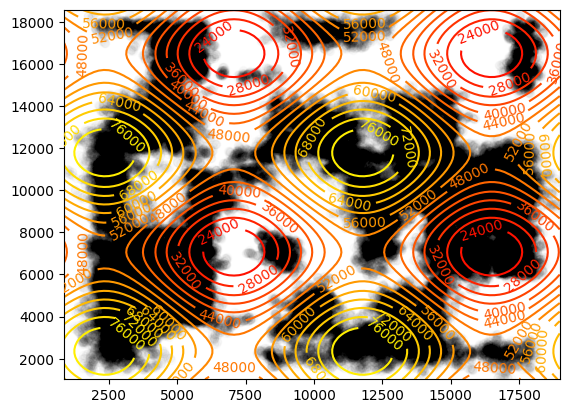

In [12]:
#necassary variables
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories

#shape for plot
shape = (nFineX, nFineY)

#take mean of all samples
unshapedMap = diffusion(fineCoordinates[:,0], fineCoordinates[:,1])

#reshape variables to make plotting easy
shapedMap = np.reshape(unshapedMap, shape)
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)

#generate contour plot
fig = plt.figure()
mapPlot = plt.contour(shapedX, shapedY, shapedMap, levels = 15, cmap = cm.autumn)
plt.clabel(mapPlot, inline=1, fontsize=10)
plt.scatter(trajectories[:,0], trajectories[:,1], alpha = 0.01, c = "black")

C:\Users\vkuma\AppData\Local\Temp\ipykernel_9776\2509423483.py:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(m, shrink = 0.5, anchor = (0.5, 0.5))


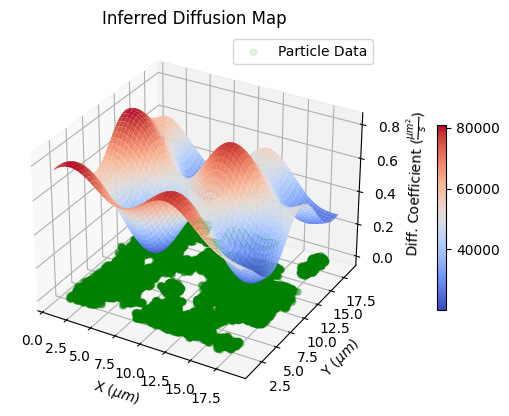

In [13]:
#necassary variables
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories
induCoordinates = variables.induCoordinates 

#shape for plot
shape = (nFineX, nFineY)

#take mean of all samples
unshapedMap = (cInduFine.T @ (cInduInduInv @ np.mean(dVect[1:], 0)))

#reshape variables to make plotting easy
shapedMap = np.reshape(unshapedMap, shape)
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)




#generate contour plot
fig = plt.axes(projection='3d')
fig.plot_surface(shapedX/1000, shapedY/1000, shapedMap/100000, cmap=cm.coolwarm)
fig.scatter3D(trajectories[:,0]/1000, trajectories[:,1]/1000, 0, color = "green", alpha = 0.1, label = "Particle Data")
#fig.scatter3D(induCoordinates[:,0], induCoordinates[:,1], 0, color = "black", alpha = 0.5, label = "Inducing Points")
fig.set_xlabel(r"X ($\mu m$)")
fig.set_ylabel(r"Y ($\mu m$)")
fig.set_zlabel(r"Diff. Coefficient ($\frac{\mu m^2}{s}$)")
fig.set_title("Inferred Diffusion Map")
#ticks = np.arange(0, 10/100, 2/100)
fig.legend()
#fig.set_zticks(ticks)
norm = matplotlib.colors.Normalize(vmin=np.min(shapedMap), vmax=np.max(shapedMap))
m = cm.ScalarMappable(cmap=cm.coolwarm, norm=norm)
m.set_array([])
plt.colorbar(m, shrink = 0.5, anchor = (0.5, 0.5))

In [225]:
# Create a 100x100 grid and assign data points to their corresponding cells
min_x, max_x = np.min(variables.dataCoordinates[:, 0]), np.max(variables.dataCoordinates[:, 0])
min_y, max_y = np.min(variables.dataCoordinates[:, 1]), np.max(variables.dataCoordinates[:, 1])

grid_size = 10
grid = [[[] for _ in range(grid_size)] for _ in range(grid_size)]

for index, point in enumerate(variables.dataCoordinates):
    x, y = point
    x_index = int(np.floor((x - min_x) / (max_x - min_x) * (grid_size-1)))
    y_index = int(np.floor((y - min_y) / (max_y - min_y) * (grid_size-1)))

    # Append the index of the point to the corresponding grid cell
    grid[x_index][y_index].append(index)

# Now `grid` contains the list of point indices assigned to their corresponding grid cells
diff = variables.sampleCoordinates - variables.dataCoordinates
dMleData = np.sum(diff*diff, axis = 1)/(4*data.deltaT)

In [234]:
dInduMle = []
for i in range(len(grid)):
    for j in range(len(grid[i])):
        if grid[i][j]:
            mle_mean = np.mean(dMleData[grid[i][j]])
        else:
            mle_mean = 0
        dInduMle.append(mle_mean)

In [236]:
plt.plot(dInduMle-np.mean(dVect[1:], 0))

ValueError: operands could not be broadcast together with shapes (100,) (636,) 

In [173]:
mleList = []
fullMle = variables.mle
for a in range(len(grid)):
    for b in range(len(grid[a])):
        #Points of trajectory where learning is possible
        nData = np.shape(grid[a][b])[0]
        trajectoriesIndex = grid[a][b][:,0]
        trajectories = grid[a][b][:,1:]
        deltaT = 1/30
        dataCoordinates = np.empty((0,2))
        for i in range(nData-1):
            if (trajectoriesIndex[i] == trajectoriesIndex[i+1]):
                dataCoordinates = np.vstack((dataCoordinates, trajectories[i]))

        #Points of trajectory that are "sampled"
        sampleCoordinates = np.empty((0,2))
        for i in range(1,nData):
            if (trajectoriesIndex[i] == trajectoriesIndex[i-1]):
                sampleCoordinates = np.vstack((sampleCoordinates, trajectories[i]))
        
        #find MLE assuming flat map
        diff = sampleCoordinates - dataCoordinates
        if (len(diff) == 0):
            mleList.append(fullMle)
        else:
            num = np.sum(diff * diff)
            den = 4*deltaT*len(diff)
            mle = num/den
            mleList.append(mle)

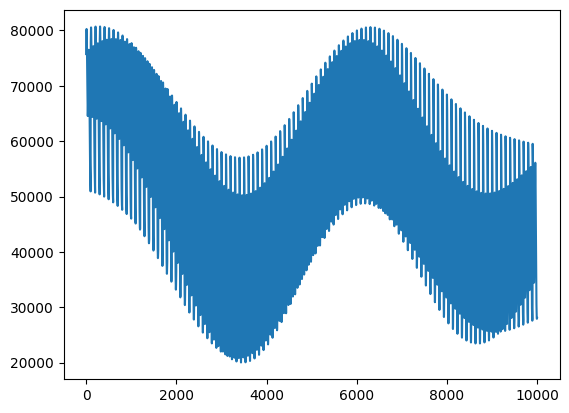

In [174]:
plt.plot(unshapedMap)

In [194]:
from scipy.spatial import KDTree
def find_closest_point_indices(target_point, points, k=20):
    kdtree = KDTree(points)
    distances, indices = kdtree.query(target_point, k=k)
    return indices
diff = variables.sampleCoordinates - variables.dataCoordinates
dMleData = np.sum(diff*diff, axis = 1)/(4*deltaT)
k = 2000
dIndu = variables.dIndu.copy()
for i in range(variables.nIndu):
    closest = find_closest_point_indices(variables.induCoordinates[i], variables.dataCoordinates, k=k)
    dIndu[i] = np.mean(dMleData[closest])
plt.plot(np.abs((dIndu-np.mean(dVect[1:], 0)))/np.mean(dVect[1:], 0))

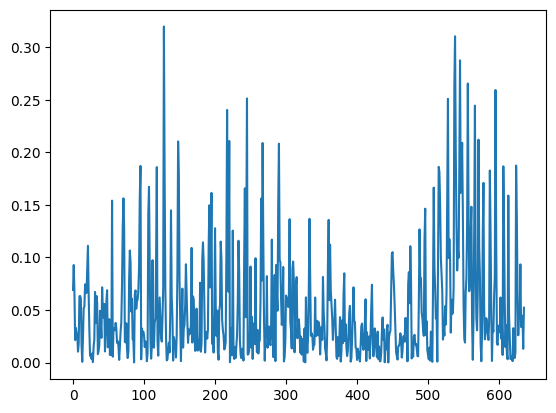

Text(0.5, 0.92, 'Ground Truth Diffusion Map')

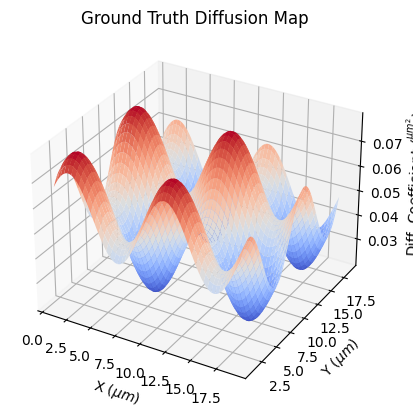

In [14]:
#necassary variables
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories

#shape for plot
shape = (nFineX, nFineY)

#take mean of all samples

unshapedMap = diffusion(fineCoordinates[:, 0], fineCoordinates[:, 1])

#reshape variables to make plotting easy
shapedMap = np.reshape(unshapedMap, shape)/1000
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)

#generate contour plot
fig = plt.axes(projection='3d')
fig.plot_surface(shapedX/1000, shapedY/1000, shapedMap/1000, cmap=cm.coolwarm)
fig.set_xlabel(r"X ($\mu m$)")
fig.set_ylabel(r"Y ($\mu m$)")
fig.set_zlabel(r"Diff. Coefficient ($\frac{\mu m^2}{s}$)")
fig.set_title("Ground Truth Diffusion Map")
#ticks = np.arange(0, 2/10, 5/100)
#fig.set_zticks(ticks)

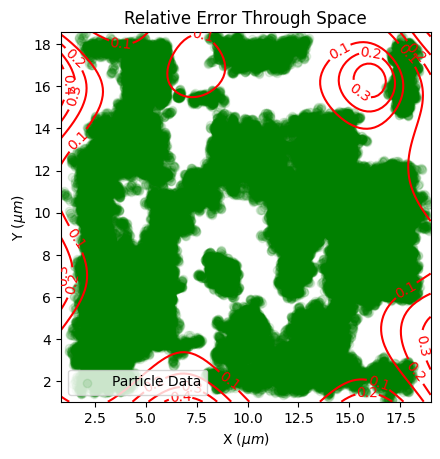

In [19]:
from cProfile import label


nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories

groundTruth = diffusion(fineCoordinates[:, 0], fineCoordinates[:, 1])
shape = (nFineX, nFineY)

unshapedMap = cInduFine.T @ cInduInduInv @ np.mean(dVect[50000:], 0)

shapedGroundTruth = np.reshape(groundTruth, shape)
shapedMap = np.reshape(unshapedMap, shape)
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)
diff = (np.abs((shapedGroundTruth - shapedMap))/shapedGroundTruth)
fig, ax = plt.subplots(1, 1)

mapPlot = plt.contour(shapedX/1000, shapedY/1000, diff, colors = 'r', levels = [.1, .2, .3, 0.4, 0.5])
plt.xlabel(r"X ($\mu m$)")
plt.ylabel(r"Y ($\mu m$)")
plt.title('Relative Error Through Space')
plt.scatter(trajectories[:,0]/1000, trajectories[:,1]/1000, color = "green", alpha = 0.1, label = "Particle Data")
plt.legend()
plt.clabel(mapPlot, inline=2, fontsize=10)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

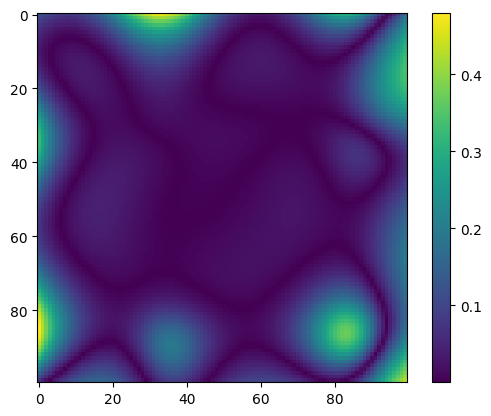

In [17]:
plt.imshow(diff)
plt.colorbar()